<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48207 entries, 0 to 48206
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        48207 non-null  object
 1   home_team   48207 non-null  object
 2   away_team   48207 non-null  object
 3   home_score  48207 non-null  int64 
 4   away_score  48207 non-null  int64 
 5   tournament  48207 non-null  object
 6   city        48207 non-null  object
 7   country     48207 non-null  object
 8   neutral     48207 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64
324 317 ['Friendly' 'British Home Championship' 'Évence Coppée Trophy'
 'Muratti Vase' 'Copa Lipton' 'Copa Newton' 'Copa Premio Honor Argentino'
 'Olympic Games' 'Copa Premio Honor Uruguayo'
 'Far Eastern Championship Games' 'Copa Roca'

C:\Users\HP\AppData\Local\Temp\ipykernel_16896\689871219.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='home_outcome', order=['Win', 'Draw', 'Loss'], palette='pastel')


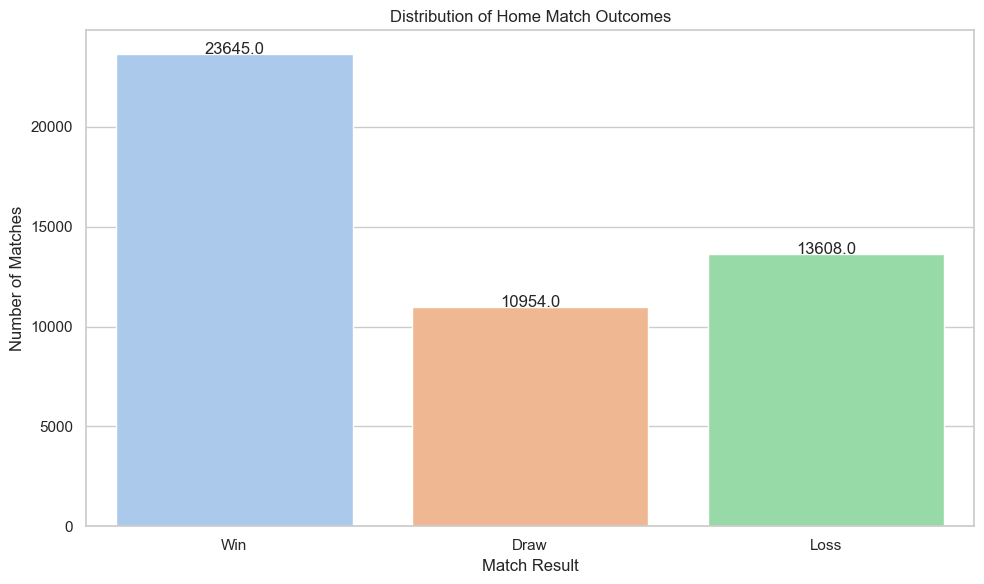

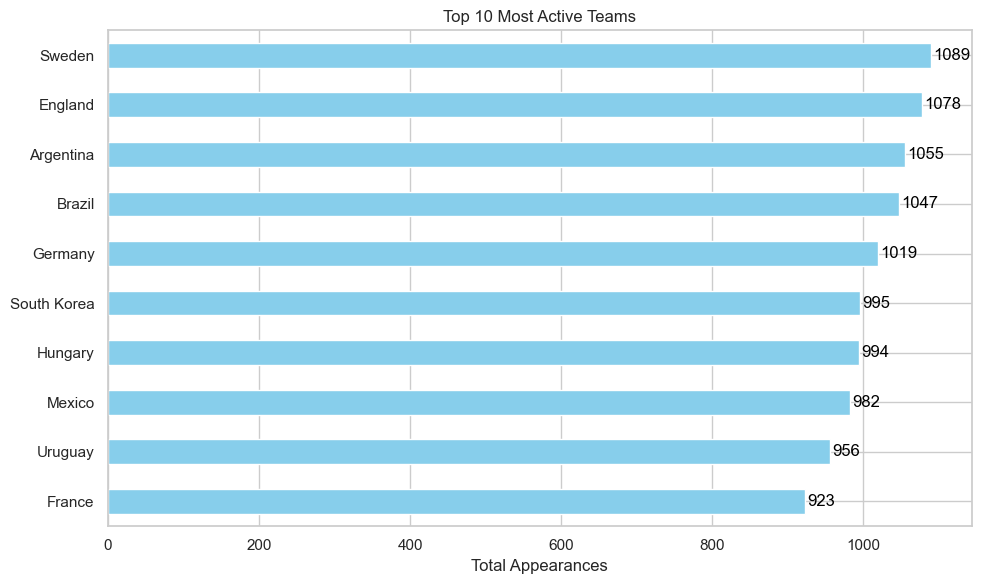

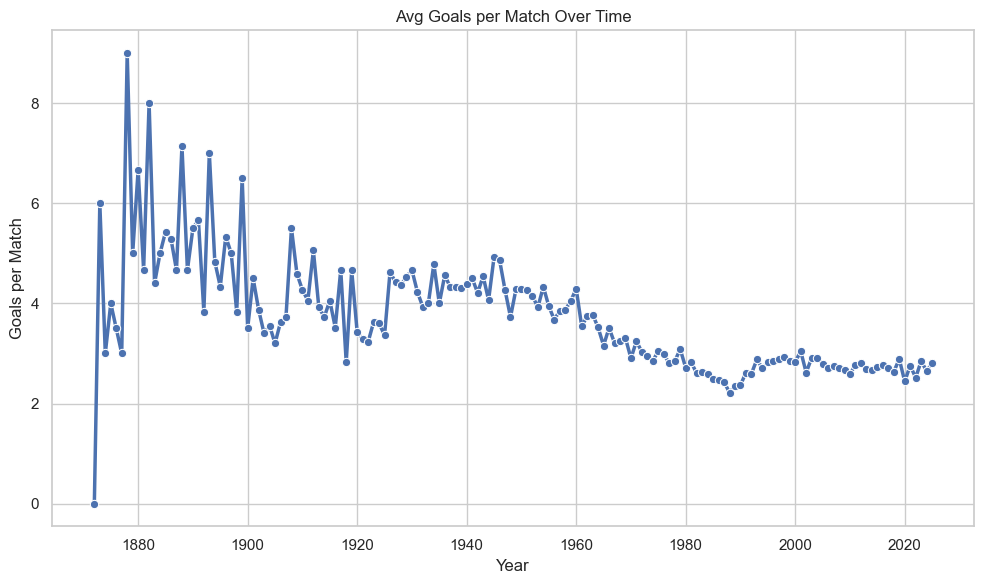

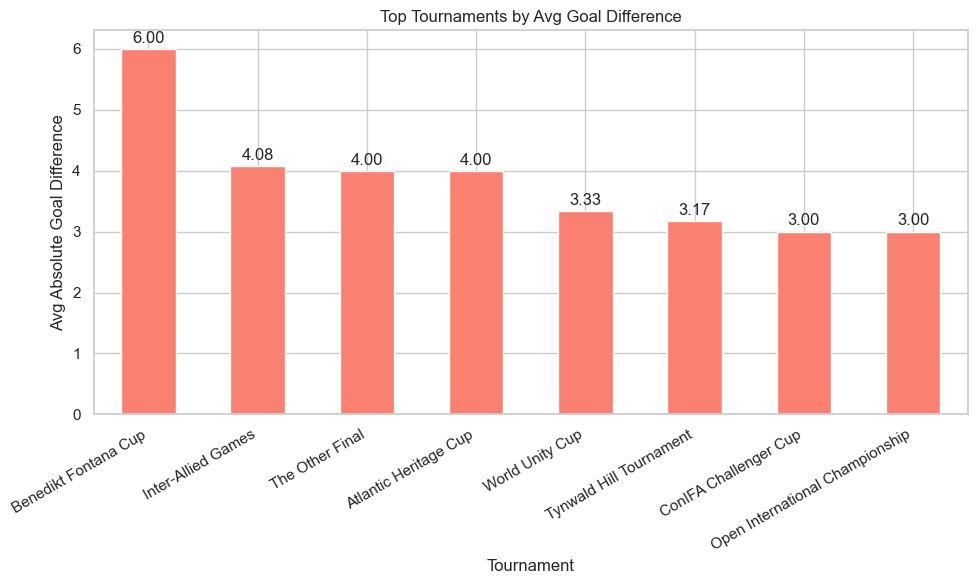

In [11]:
# 1. Importing librqaries.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')  # Better background and gridlines
plt.rcParams['figure.figsize'] = (10, 6)  # Set default figure size


# 2. Loading Data.
df = pd.read_csv('../data/results.csv')
df.head()

# Checking dataset structure.
df.info()

# Checking for missing values.
df.isnull().sum()
print(df.isnull().sum())

# Basic stats overview.
df.describe()

# Viewing unique values in key columns.
df['home_team'].nunique(), df['away_team'].nunique(), df['tournament'].unique()
print(df['home_team'].nunique(), df['away_team'].nunique(), df['tournament'].unique())

# Converting date to datetime format.
df['date'] = pd.to_datetime(df['date'])

# Removing duplicates if any.
df.drop_duplicates(inplace=True)

# Creating a column for goal difference.
df['goal_difference'] = df['home_score'] - df['away_score']

# Creating a match outcome for home team.
def get_outcome(row):
    if row['home_score'] > row['away_score']:
        return 'Win'
    elif row['home_score'] < row['away_score']:
        return 'Loss'
    else:
        return 'Draw'

df['home_outcome'] = df.apply(get_outcome, axis=1)


###distribution of match outcomes.
# Plotting outcome distribution.
ax = sns.countplot(data=df, x='home_outcome', order=['Win', 'Draw', 'Loss'], palette='pastel')
ax.set_title('Distribution of Home Match Outcomes')
ax.set_xlabel('Match Result')
ax.set_ylabel('Number of Matches')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 5))
plt.tight_layout()
plt.show()



###top 10 countries by match appearances.
# Combining home and away teams.
team_counts = pd.concat([df['home_team'], df['away_team']])
top_teams = team_counts.value_counts().head(10)

ax = top_teams.plot(kind='barh', color='skyblue')
ax.set_title('Top 10 Most Active Teams')
ax.set_xlabel('Total Appearances')
ax.invert_yaxis()  # Highest at top

for i, v in enumerate(top_teams):
    ax.text(v + 3, i, str(v), color='black', va='center')
plt.tight_layout()
plt.show()



###Goals over time.
# Grouping by year and summing goals.
df['year'] = df['date'].dt.year
df['total_goals'] = df['home_score'] + df['away_score']
avg_goals = df.groupby('year')['total_goals'].mean()

sns.lineplot(x=avg_goals.index, y=avg_goals.values, marker='o', linewidth=2.5)
plt.title('Avg Goals per Match Over Time')
plt.xlabel('Year')
plt.ylabel('Goals per Match')
plt.grid(True)
plt.tight_layout()
plt.show()



###Average Goal Difference by Tournament Type (Top 8 Only).
# Grouping and sorting by average goal difference.
gd = df.groupby('tournament')['goal_difference'].mean().abs().sort_values(ascending=False).head(8)

ax = gd.plot(kind='bar', color='salmon')
ax.set_title('Top Tournaments by Avg Goal Difference')
ax.set_ylabel('Avg Absolute Goal Difference')
ax.set_xlabel('Tournament')
plt.xticks(rotation=30, ha='right')
for i, val in enumerate(gd.values):
    ax.text(i, val + 0.1, f'{val:.2f}', ha='center')
plt.tight_layout()
plt.show()










